# Predicting personality and morality 

                               Yash Tusharbhai Desai

## Importing required packages and libraries

In [1]:
import pandas as pd
import numpy as np
import xgboost
from sklearn.svm import SVR
from sklearn import metrics
from xgboost import XGBRegressor
import warnings
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV


# Loading Datasets

## Loading Features

In [118]:
features_np = np.load('./all_features.npy',allow_pickle=True)

Loading featrues into separate columns to visualize them better

In [119]:
all_features_df = pd.DataFrame(features_np, columns=['track_id','mean_tempogram','std_tempogram','tempo','mean_chromagram','std_chromagram','mean_tonnetz','std_tonnetz'])
all_features_df.head(5)

,track_id,mean_tempogram,std_tempogram,tempo,mean_chromagram,std_chromagram,mean_tonnetz,std_tonnetz
0,003iCjGOKi7p4eqjfLB4oe,"[1.0, 0.7412379991238592, 0.4727160116838918, ...","[0.0, 0.0588414369726244, 0.1119372427505086, ...",[129.19921875],"[0.6213773, 0.5328872, 0.7337723, 0.53974116, ...","[0.22755098, 0.16868216, 0.25294387, 0.1405694...","[0.1260238282237878, 0.21596732250556822, -0.1...","[0.1690566870239519, 0.1331983005898159, 0.196..."
1,008amsyxwFSwzy1mGg1OUo,"[1.0, 0.7883907213688132, 0.6127495113820646, ...","[0.0, 0.08087155285113891, 0.12503193082917255...",[135.99917763157896],"[0.63713676, 0.7775222, 0.62572455, 0.60260445...","[0.17084418, 0.20734662, 0.17614754, 0.2022059...","[-0.05582931521781939, -0.0720259814569404, 0....","[0.11754338592833932, 0.08080296893698279, 0.0..."
2,009V0srjrA7XxggtXWCUVj,"[1.0, 0.8591355938024452, 0.7347008568322577, ...","[0.0, 0.05454604990310976, 0.07257375127346871...",[112.34714673913044],"[0.63997394, 0.6294401, 0.70880115, 0.82567215...","[0.13467869, 0.16503988, 0.15328592, 0.1603661...","[-0.009621199648483793, -0.04673545687415006, ...","[0.09961151260404025, 0.04363221571816535, 0.0..."
3,00C5llfInrmXgjBrT40L1J,"[1.0, 0.7830347508797034, 0.5453902727795352, ...","[0.0, 0.04430910665944716, 0.076707411468642, ...",[95.703125],"[0.48655587, 0.52209693, 0.5439074, 0.4144636,...","[0.22127919, 0.17821014, 0.26357108, 0.1459093...","[0.2425891199719224, 0.04781541031605666, -0.2...","[0.11112139044492667, 0.16307965189725812, 0.1..."
4,00InLesTnEYlgbiCRtQizL,"[1.0, 0.866055028654943, 0.8038137481224757, 0...","[0.0, 0.049326448871270245, 0.0580282591269288...",[117.45383522727273],"[0.81014526, 0.8325014, 0.81593543, 0.828597, ...","[0.11739176, 0.12274492, 0.1304595, 0.13805756...","[-0.01704600444149308, -0.01779705409885323, -...","[0.06817070443649205, 0.08850297094434059, 0.0..."


### Merging all the 229 feature values into a single array

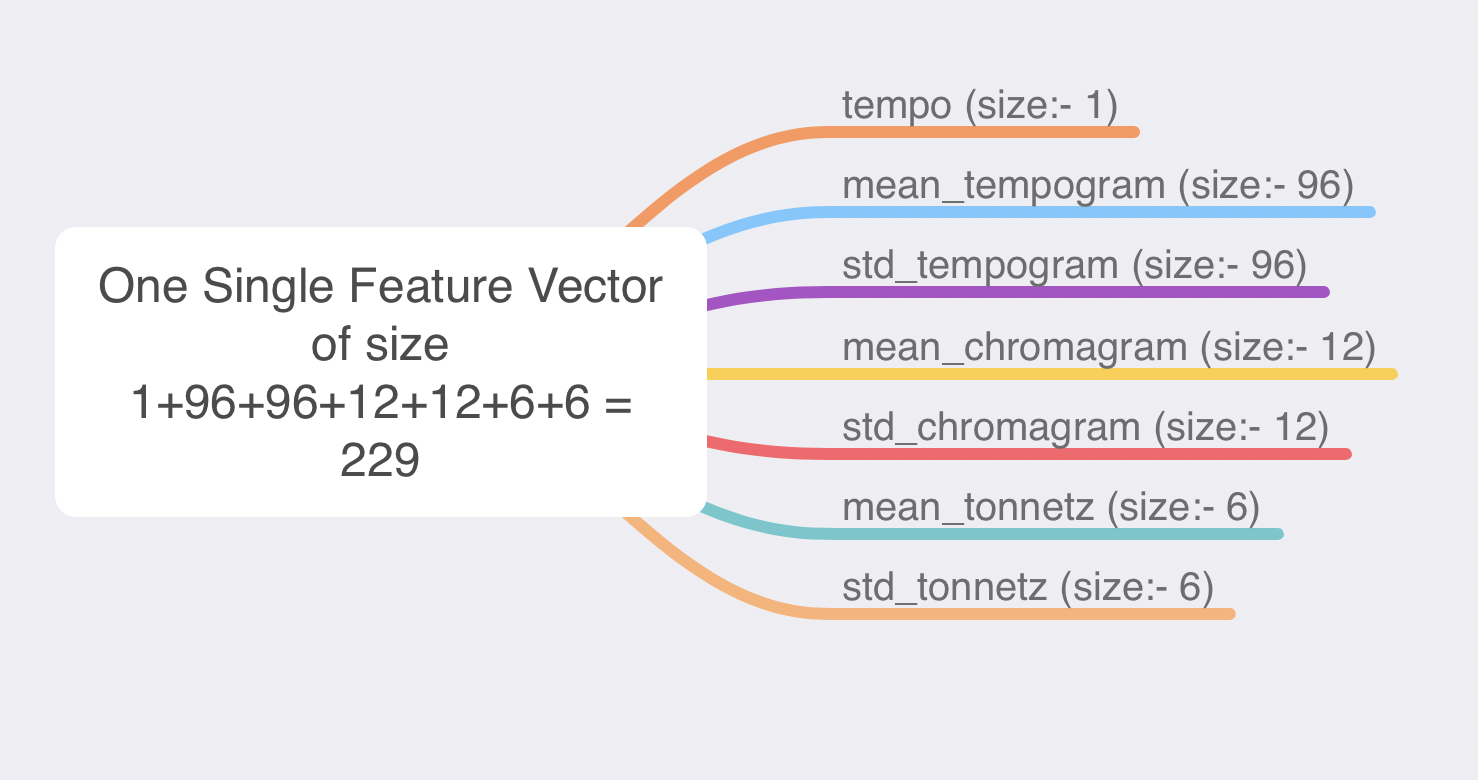

In [120]:
one_array = []
track_ids = []
for i in range(len(features_np)):
    one_feature = np.concatenate((features_np[i][3], features_np[i][1], features_np[i][2], features_np[i][4], features_np[i][5], features_np[i][6], features_np[i][7]))
    one_array.append(one_feature)
    track_ids.append(features_np[i][0])
one_array = np.array(one_array).astype('float32')
print('The shape of our feature array is: -',one_array.shape)
one_array[0]

The shape of our feature array is: - (11180, 229)


array([ 1.29199219e+02,  1.00000000e+00,  7.41237998e-01,  4.72716004e-01,
        4.01114434e-01,  3.96107048e-01,  4.32125270e-01,  5.12008190e-01,
        5.48045576e-01,  4.96326447e-01,  4.48788851e-01,  4.30853158e-01,
        4.47439492e-01,  4.91128862e-01,  4.94462460e-01,  4.29428935e-01,
        3.61250460e-01,  3.38929445e-01,  3.62722397e-01,  4.41248506e-01,
        5.38648367e-01,  5.34732640e-01,  4.23297167e-01,  3.24935228e-01,
        2.89269835e-01,  2.83819914e-01,  3.09512287e-01,  3.36682856e-01,
        3.24578524e-01,  2.76548982e-01,  2.45640635e-01,  2.44614661e-01,
        2.66858786e-01,  2.75683612e-01,  2.34920904e-01,  1.87942147e-01,
        1.64719462e-01,  1.60023630e-01,  1.80145219e-01,  2.23499790e-01,
        2.39709392e-01,  2.01214164e-01,  1.45149335e-01,  1.12376437e-01,
        1.01751119e-01,  1.03743002e-01,  1.10554419e-01,  1.08710438e-01,
        9.30104777e-02,  8.05889890e-02,  7.25800544e-02,  7.05595836e-02,
        7.11078346e-02,  

### Creating a DataFrame for our feature vector 

In [121]:
track_df = pd.DataFrame({'track_id':track_ids})
features_one = df = pd.DataFrame(((x,) for x in one_array), columns=['feature_vector'])
feature_vector_df = pd.concat([track_df,features_one],axis=1)
feature_vector_df

,track_id,feature_vector
0,003iCjGOKi7p4eqjfLB4oe,"[129.19922, 1.0, 0.741238, 0.472716, 0.4011144..."
1,008amsyxwFSwzy1mGg1OUo,"[135.99918, 1.0, 0.7883907, 0.6127495, 0.62591..."
2,009V0srjrA7XxggtXWCUVj,"[112.347145, 1.0, 0.85913557, 0.73470086, 0.71..."
3,00C5llfInrmXgjBrT40L1J,"[95.703125, 1.0, 0.78303474, 0.54539025, 0.472..."
4,00InLesTnEYlgbiCRtQizL,"[117.453835, 1.0, 0.866055, 0.80381376, 0.8214..."
...,...,...
11175,7zrWPRYubwn8k8Id80LDCv,"[92.28516, 1.0, 0.7989711, 0.59106886, 0.54705..."
11176,7zrxGPR1UVK2iSK793vLPl,"[161.49902, 1.0, 0.73596185, 0.47786754, 0.423..."
11177,7zsiCG0hk9G7iQ5KnSPG7T,"[129.19922, 1.0, 0.7602166, 0.5001286, 0.41274..."
11178,7zv2ojb0PAuMalnaOJd0Qv,"[117.453835, 1.0, 0.81133294, 0.67105514, 0.65..."


##  Loading labels and track data

In [2]:
big5_mft_tracks = pd.read_csv('./big5_mft_tracks.csv',index_col=False)
personality_data = pd.read_csv('./filtered_big5.csv',index_col=False)
morality_data = pd.read_csv('./filtered_mft.csv',index_col=False)

## Merging our data so that we have a DataFrame with all the artists that users (pollsters) like and top 5 tracks of those artists.

In [123]:

'''
This dataframe is of the same size as our feature set (11180) and is merged on the column:-'track_id'. This will
give us the 'processed_artist_name' corresponding to all the tracks and its features. The 'processed_artist_name'
will be further used to extract artists and their songs for every pollster id in morality and personality data.

'''
features_data = pd.merge(big5_mft_tracks,feature_vector_df, on='track_id')
features_data = features_data.drop(['Unnamed: 0'],axis=1)
features_data.head(5) 

,artist_name,song_title,preview_url,track_id,artist_id,track_popularity,processed_artist_name,feature_vector
0,12th Planet,Follow,https://p.scdn.co/mp3-preview/ef07dc598b117870...,1HJW2w61lh3XcsnfnOR9p4,3V1h3kAdiVDBiwlY2i6dJz,40.0,12th planet,"[151.99908, 1.0, 0.7784917, 0.61665344, 0.6178..."
1,12th Planet,Swamplex Terrestrial,https://p.scdn.co/mp3-preview/bfe1fffd48350137...,35Qf9mP6LoopjOVwgPAKoY,3V1h3kAdiVDBiwlY2i6dJz,26.0,12th planet,"[151.99908, 1.0, 0.7149835, 0.51125443, 0.5474..."
2,12th Planet,Supernova,https://p.scdn.co/mp3-preview/a492095a74937ed7...,5Yu2XAETE0p1dLzbgoX3WN,3V1h3kAdiVDBiwlY2i6dJz,24.0,12th planet,"[151.99908, 1.0, 0.69585574, 0.4721279, 0.4757..."
3,12th Planet,Let It Bang,https://p.scdn.co/mp3-preview/5cb107204eaa46ec...,2A7C2pIp1N0sgOi0aM6z3g,3V1h3kAdiVDBiwlY2i6dJz,20.0,12th planet,"[151.99908, 1.0, 0.7084564, 0.49900118, 0.5179..."
4,12th Planet,Let Us Prey,https://p.scdn.co/mp3-preview/15a9234eff6e1126...,5TMYoiWElQzD4UsTvtX8kx,3V1h3kAdiVDBiwlY2i6dJz,15.0,12th planet,"[151.99908, 1.0, 0.7706448, 0.60469663, 0.6148..."


### Renaming features_data, personality_data and morality data so that we can perform a merge using the same column name

In [124]:
features_data.rename(columns = {'processed_artist_name':'processed_page/artist_name'}, inplace = True)
personality_data.rename(columns = {'processed_page_name':'processed_page/artist_name'}, inplace = True)
morality_data.rename(columns = {'processed_page_name':'processed_page/artist_name'}, inplace = True)

### Merging our features_data with the personality data using the column name 'processed_page/artist_name'. This will give us 81520 rows, which will have which will have  liked artists of pollster/user_ids and the top 5 songs of that artists.

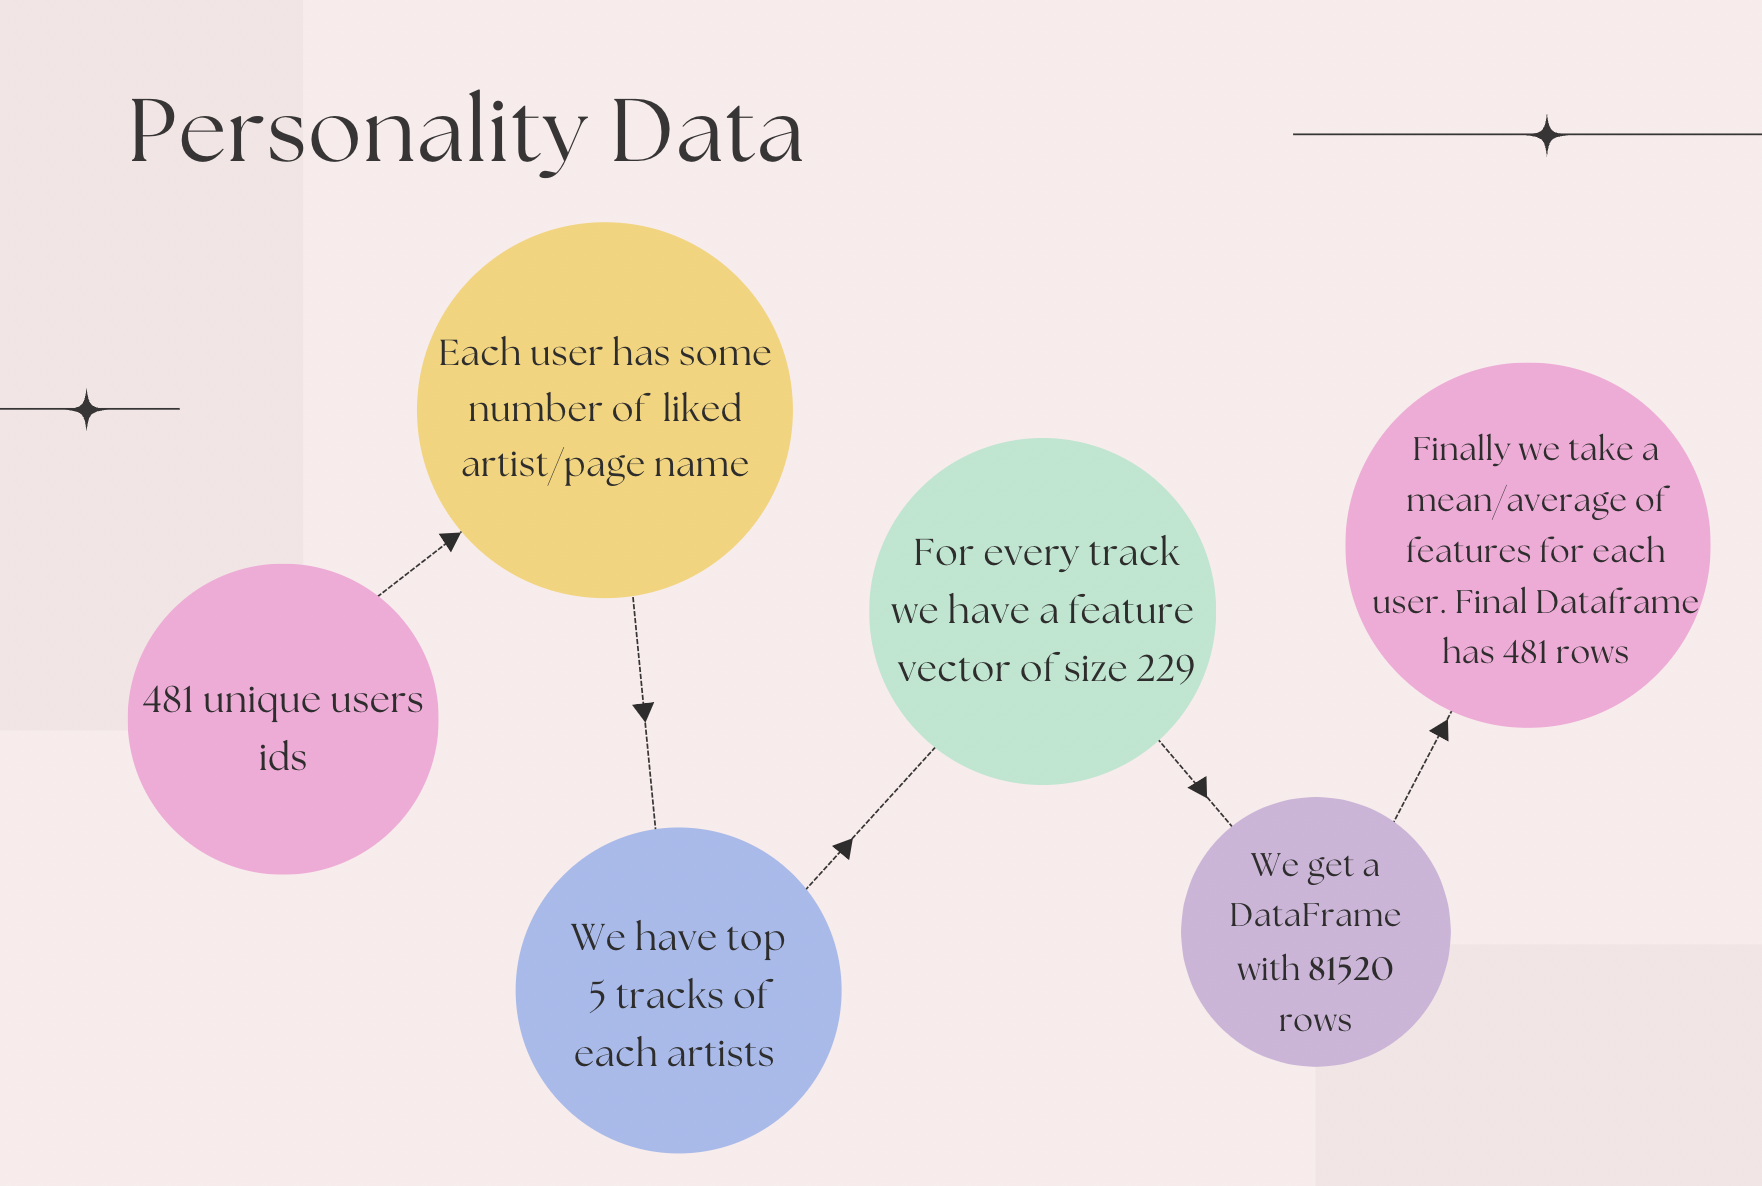

In [125]:
features_personality =  pd.merge(personality_data,features_data, on=['processed_page/artist_name'])
features_personality = features_personality.drop(['artist_name','preview_url','track_id','artist_id','track_popularity','Unnamed: 0','Music/Artist_Page_name','category','song_title','processed_page/artist_name'],axis=1)
print('The number of rows entries in the features_personality dataframe are:- ',len(features_personality))
print('The number of unique users in the personality data are:-', len(features_personality['pollster_user_id'].unique()))
features_personality.head(5)

The number of rows entries in the features_personality dataframe are:-  81520
The number of unique users in the personality data are:- 481


,pollster_user_id,Extraversion,Agreeableness,Conscientiousness,Openness,Neurotisism,feature_vector
0,65,9.0,3.0,10.0,7.0,6.0,"[123.046875, 1.0, 0.92557836, 0.86233497, 0.84..."
1,65,9.0,3.0,10.0,7.0,6.0,"[123.046875, 1.0, 0.90434706, 0.853212, 0.8619..."
2,65,9.0,3.0,10.0,7.0,6.0,"[123.046875, 1.0, 0.6948316, 0.45649955, 0.445..."
3,65,9.0,3.0,10.0,7.0,6.0,"[123.046875, 1.0, 0.76202863, 0.5560844, 0.552..."
4,65,9.0,3.0,10.0,7.0,6.0,"[129.19922, 1.0, 0.9181301, 0.8782712, 0.87862..."


### Merging our features_data with the morality data using the column name 'processed_page/artist_name'. This will give us 97160 rows, which will have  liked artists of pollster/user_ids and the top 5 songs of that artists.

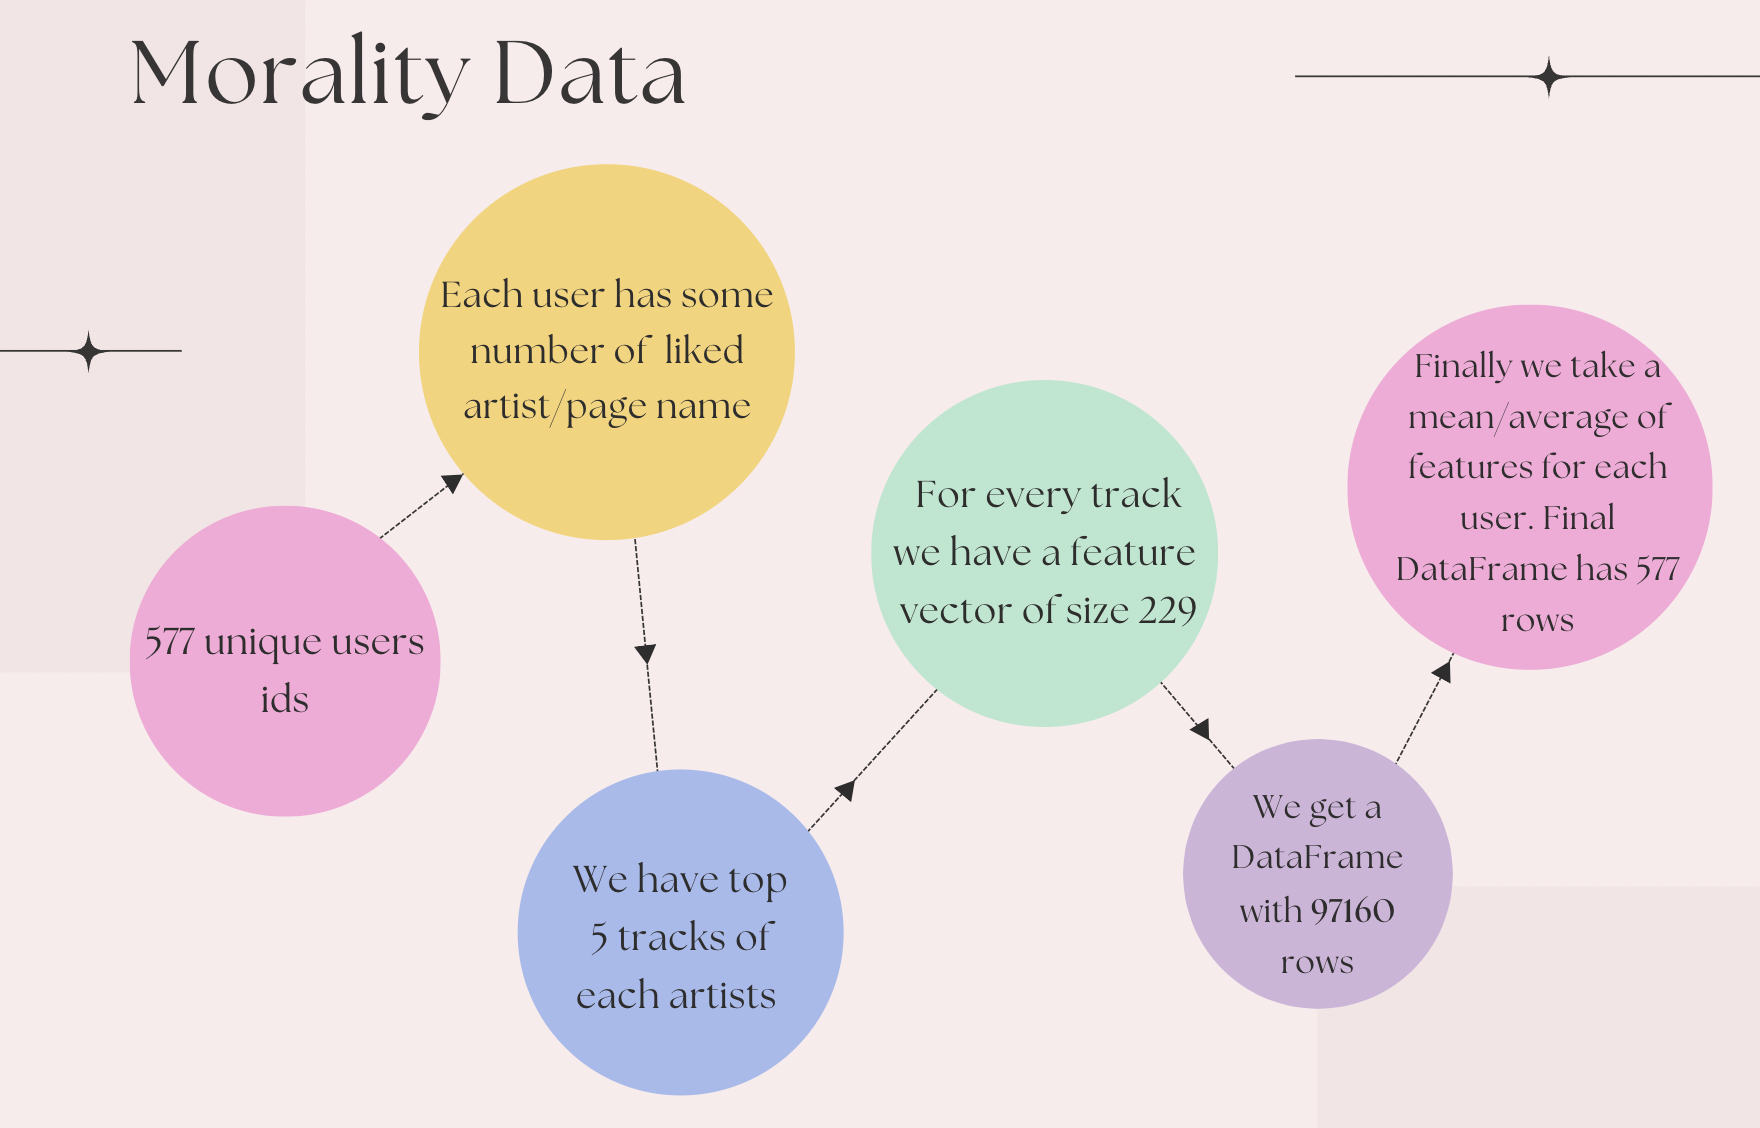

In [126]:
features_morality = pd.merge(morality_data,features_data, on=['processed_page/artist_name'])
features_morality = features_morality.drop(['artist_name','preview_url','track_id','artist_id','track_popularity','Unnamed: 0','Music/Artist_Page_name','category','song_title','processed_page/artist_name'],axis=1)
print('The number of rows entries in the features_morality dataframe are:- ',len(features_morality))
print('The number of unique users in the morality data are:-', len(features_morality['pollster_user_id'].unique()))
features_morality.head(5)

The number of rows entries in the features_morality dataframe are:-  97160
The number of unique users in the morality data are:- 577


,pollster_user_id,Care,Fairness,Loyalty,Authority,Purity,Individualism,SocialBinding,feature_vector
0,9,22.0,22.0,10.0,13.0,16.0,22.0,13.0,"[103.359375, 1.0, 0.62312037, 0.2714267, 0.202..."
1,9,22.0,22.0,10.0,13.0,16.0,22.0,13.0,"[117.453835, 1.0, 0.7135329, 0.41768476, 0.333..."
2,9,22.0,22.0,10.0,13.0,16.0,22.0,13.0,"[123.046875, 1.0, 0.7847495, 0.5645804, 0.4997..."
3,9,22.0,22.0,10.0,13.0,16.0,22.0,13.0,"[123.046875, 1.0, 0.8232021, 0.63342595, 0.574..."
4,9,22.0,22.0,10.0,13.0,16.0,22.0,13.0,"[123.046875, 1.0, 0.75795406, 0.4903437, 0.394..."


### Performing PCA for dimensionality reduction

In [127]:
features_morality_arr = []
features_personality_arr = []

In [128]:
for i in range(len(np.array(features_personality['feature_vector']))):
    features_personality_arr.append(features_personality['feature_vector'][i])

for j in range(len(np.array(features_morality['feature_vector']))):
    features_morality_arr.append(features_morality['feature_vector'][j])  
    
# personality_features_arr, avg_morality_features_arr = np.array(avg_personality_features_arr), np.array(avg_morality_features_arr)

In [129]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

st1 = StandardScaler().fit_transform(features_personality_arr)
pca1 = PCA(n_components = 36, svd_solver='full')
personality_pc = pca1.fit_transform(st1) 
print ( "Components = ", pca1.n_components_ , "\nTotal explained variance = ",
      round(pca1.explained_variance_ratio_.sum(),5)  )

Components =  36 
Total explained variance =  0.90132


In [130]:
personality_pc.shape

(81520, 36)

In [131]:
st2 = StandardScaler().fit_transform(features_morality_arr)
pca2 = PCA(n_components = 36, svd_solver='full')
morality_pc = pca2.fit_transform(st2) 
print ( "Components = ", pca2.n_components_ , "\nTotal explained variance = ",
      round(pca2.explained_variance_ratio_.sum(),5)  )

Components =  36 
Total explained variance =  0.90206


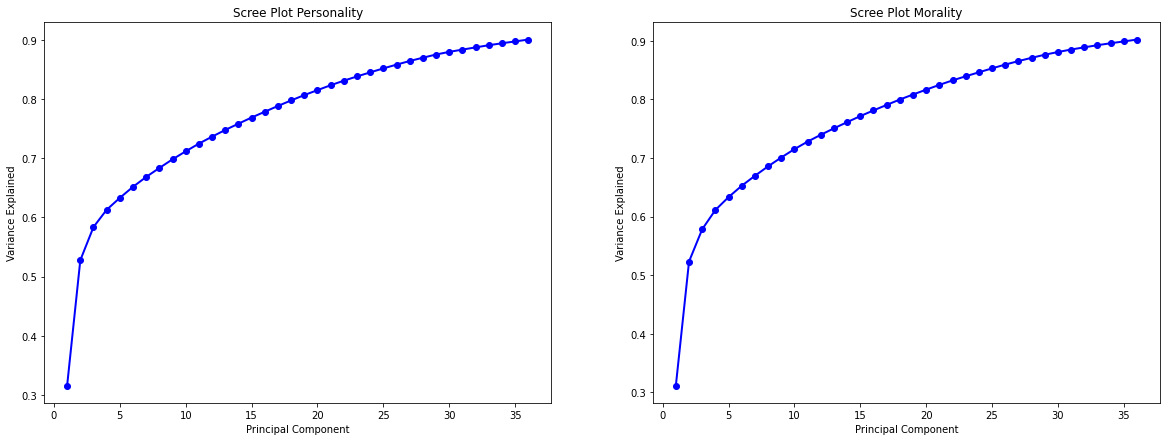

In [132]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
pc_value_personality = np.arange(pca1.n_components_) + 1
plt.plot(pc_value_personality, np.cumsum(pca1.explained_variance_ratio_), 'o-', linewidth=2, color='blue')
plt.title('Scree Plot Personality')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.subplot(1,2,2)
pc_value_morality = np.arange(pca2.n_components_) + 1
plt.plot(pc_value_morality, np.cumsum(pca2.explained_variance_ratio_), 'o-', linewidth=2, color='blue')
plt.title('Scree Plot Morality')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()




#### Loading dimensionaly reduced data (pca) into our data frame

In [133]:
features_personality_pca = features_personality.copy()
features_morality_pca = features_morality.copy()

features_personality_pca['feature_vector'] = list(personality_pc)
features_morality_pca['feature_vector'] = list(morality_pc)

## Now that we have data for every user, we will take the average/mean of all the songs and all the artists so that we have exactly one feature vector (length 229) which will represent all the 7 featrues for each user.
i.e :- <i>[tempo, mean_tempogram,std_tempogram,mean_chromagram,std_chromagram,mean_tonnetz,std_tonnetz]<i>

## This means we will now have the personality features and labels for 481 unique users while morality features and labels for 577 unique users 

In [206]:
avg_personality_features = features_personality_pca.groupby(by='pollster_user_id')['feature_vector'].mean()
avg_personality_labels = features_personality_pca.groupby(by='pollster_user_id')['Extraversion', 'Agreeableness',
       'Conscientiousness', 'Openness', 'Neurotisism'].mean()

avg_personality_features = avg_personality_features.reset_index()
avg_personality_labels = avg_personality_labels.reset_index()
print('Computed average of features and labels (personality) for each pollster_user_id')

Computed average of features and labels (personality) for each pollster_user_id


In [207]:
avg_morality_features = features_morality_pca.groupby(by='pollster_user_id')['feature_vector'].mean()
avg_morality_labels = features_morality_pca.groupby(by='pollster_user_id')['Care', 'Fairness', 'Loyalty', 'Authority',
       'Purity', 'Individualism', 'SocialBinding'].mean()

avg_morality_features = avg_morality_features.reset_index()
avg_morality_labels = avg_morality_labels.reset_index()
print('Computed average of features and labels (morality) for each pollster_user_id')

Computed average of features and labels (morality) for each pollster_user_id


### Creating the avg_personality_features and avg_morality_features arrays further getting the input data to our models

In [208]:
avg_personality_features = avg_personality_features['feature_vector']
avg_morality_features = avg_morality_features['feature_vector']

### Copying the avg_personality and avg_morality featurs into a new array to change the dtype of the array from 'object' to 'float32' and converting both the lists to numpy arrays.

In [209]:
avg_personality_features_arr = []
avg_morality_features_arr = []

In [210]:
for i in range(len(avg_personality_features)):
    avg_personality_features_arr.append(avg_personality_features[i])

for j in range(len(avg_morality_features)):
    avg_morality_features_arr.append(avg_morality_features[j])  
    
avg_personality_features_arr, avg_morality_features_arr = np.array(avg_personality_features_arr), np.array(avg_morality_features_arr)

## Create inputs and outputs for our prediction models

In [211]:
# Personality
X_personality = avg_personality_features_arr

y_Extraversion = avg_personality_labels['Extraversion'].astype('float32')
y_Agreeableness = avg_personality_labels['Agreeableness'].astype('float32')
y_Conscientiousness = avg_personality_labels['Conscientiousness'].astype('float32')
y_Openness = avg_personality_labels['Openness'].astype('float32')
y_Neurotisism = avg_personality_labels['Neurotisism'].astype('float32')

y_personality_list = [y_Extraversion,y_Agreeableness,y_Conscientiousness,y_Openness,y_Neurotisism]

#  Morality
X_morality = avg_morality_features_arr

y_Care = avg_morality_labels['Care'].astype('float32')
y_Fairness = avg_morality_labels['Fairness'].astype('float32')
y_Loyalty = avg_morality_labels['Loyalty'].astype('float32')
y_Authority = avg_morality_labels['Authority'].astype('float32')
y_Purity = avg_morality_labels['Purity'].astype('float32')
y_Individualism = avg_morality_labels['Individualism'].astype('float32')
y_SocialBinding = avg_morality_labels['SocialBinding'].astype('float32')

y_morality_list = [y_Care,y_Fairness,y_Loyalty,y_Authority,y_Purity,y_Individualism,y_SocialBinding]

In [212]:
X_personality.shape, len(y_personality_list)

((481, 36), 5)

In [213]:
features_personality.columns

Index(['pollster_user_id', 'Extraversion', 'Agreeableness',
       'Conscientiousness', 'Openness', 'Neurotisism', 'feature_vector'],
      dtype='object')

# Prediction Models

In [832]:
'''
Creating methods to train the regression models
'''

def RandomForest(X,y_list):
    model = RandomForestRegressor()
    cv = LeaveOneOut()
    r2 = []
    adj_r2 = []
    for y in y_list:
        model.fit(X,y)
        predictions = sklearn.model_selection.cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
        score = metrics.r2_score(y,predictions)
        r2.append(score)
    return r2 


def LinearReg(X,y_list):
    
    X = sm.add_constant(X)
    model = LinearRegression()
    cv = LeaveOneOut()
    r2 = []
    adj_r2 = []
    for y in y_list:
        model.fit(X,y)
        predictions = sklearn.model_selection.cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
        score = model.score(X,y)
        r2.append(score)
    return r2


def OLS(X,y_list):
    
    X = sm.add_constant(X)
    r2 = []
    adj_r2 = []
    for y in y_list:
        ols = sm.OLS(y, X)
        results= ols.fit()
        ols_score = results.rsquared
        ols_r2_adj = results.rsquared_adj
        r2.append(ols_score)
        adj_r2.append(ols_r2_adj)
        
        print(y.name)
        for key in results.pvalues.keys():
            if results.pvalues[key]<= 0.05:
                print(f"\t{key}: \n\t\tcoeff = {results.params[key]:.2f}, p = {results.pvalues[key]:.3f}")
            
    return r2, adj_r2


def XGB(X,y_list):
    model = XGBRegressor()
    cv = LeaveOneOut()
    r2 = []
    adj_r2 = []
    for y in y_list:
        model.fit(X,y)
        predictions = sklearn.model_selection.cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
        score = metrics.r2_score(y,predictions)
        r2.append(score)
    return r2 

def SVReg(X,y_list):
    model = SVR()
    cv = LeaveOneOut()
    r2 = []
    adj_r2 = []
    for y in y_list:
        model.fit(X,y)
        predictions = sklearn.model_selection.cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
        score = metrics.r2_score(y,predictions)
        r2.append(score)
    return r2 



# Predicting Personality

In [163]:
r2_rf_personality  = RandomForest(X_personality, y_personality_list)
r2_rf_personality

[-0.07064841990102222,
 -0.07607543225106861,
 -0.05710308983216783,
 -0.05789768344702795,
 -0.11347255387936128]

In [160]:
r2_lr_personality = LinearReg(X_personality, y_personality_list)
r2_lr_personality

[0.0940310992049388,
 0.08075522913589239,
 0.06756864588970646,
 0.08678063051668106,
 0.07369584552999742]

In [159]:
r2_ols_personality, adj_r2_ols_personality = OLS(X_personality, y_personality_list)
r2_ols_personality, adj_r2_ols_personality 

Extraversion
	const: 
		coeff = 8.77, p = 0.000
	x12: 
		coeff = 2.18, p = 0.000
	x22: 
		coeff = 1.68, p = 0.021
	x25: 
		coeff = -1.75, p = 0.035
Agreeableness
	const: 
		coeff = 9.54, p = 0.000
	x11: 
		coeff = 2.02, p = 0.005
Conscientiousness
	const: 
		coeff = 9.50, p = 0.000
Openness
	const: 
		coeff = 8.74, p = 0.000
	x18: 
		coeff = -2.12, p = 0.005
	x19: 
		coeff = -1.94, p = 0.027
Neurotisism
	const: 
		coeff = 9.41, p = 0.000
	x21: 
		coeff = 1.98, p = 0.004
	x35: 
		coeff = 2.55, p = 0.042


([0.09403109920493902,
  0.08075522913589239,
  0.06756864588970679,
  0.08678063051668095,
  0.0736958455299973],
 [0.020574161302636673,
  0.006221869336099806,
  -0.008033896335452262,
  0.012735816774790187,
  -0.001409896724327231])

In [164]:
r2_xgb_personality = XGB(X_personality, y_personality_list)
r2_xgb_personality 

[-0.29137078673875494,
 -0.2952937555482087,
 -0.3147177078458536,
 -0.2631765607934715,
 -0.44296342030801017]

In [165]:
r2_svr_personality = SVReg(X_personality, y_personality_list)
r2_svr_personality

[-0.0678086739734991,
 -0.0072465899880913565,
 -0.10287487735599066,
 -0.04159665267445334,
 -0.0630308900719101]

# Predicting Morality

In [166]:
r2_rf_morality = RandomForest(X_morality, y_morality_list)
r2_rf_morality

[-0.024036326686201148,
 -0.09674153006627084,
 0.010212639098803988,
 -0.01634858524134608,
 0.03811140971426008,
 -0.06593798983976829,
 0.036699663654505166]

In [162]:
r2_lr_morality = LinearReg(X_morality, y_morality_list)
r2_lr_morality

[0.10066857109781246,
 0.0883426035824797,
 0.11393176870931054,
 0.11580825535646933,
 0.15166196966837997,
 0.1107824565379143,
 0.14391757393610838]

In [161]:
r2_ols_morality, adj_r2_ols_morality = OLS(X_morality, y_morality_list)
r2_ols_morality, adj_r2_ols_morality 

Care
	const: 
		coeff = 18.88, p = 0.000
	x3: 
		coeff = 0.64, p = 0.014
	x26: 
		coeff = -3.24, p = 0.031
Fairness
	const: 
		coeff = 20.98, p = 0.000
	x35: 
		coeff = -3.19, p = 0.015
Loyalty
	const: 
		coeff = 14.42, p = 0.000
	x1: 
		coeff = 0.28, p = 0.010
	x10: 
		coeff = -2.56, p = 0.040
	x24: 
		coeff = 3.23, p = 0.048
	x31: 
		coeff = -4.81, p = 0.029
	x35: 
		coeff = 4.75, p = 0.038
Authority
	const: 
		coeff = 12.86, p = 0.000
	x13: 
		coeff = 2.76, p = 0.042
	x18: 
		coeff = 4.12, p = 0.005
	x23: 
		coeff = 3.71, p = 0.007
	x31: 
		coeff = -4.32, p = 0.050
Purity
	const: 
		coeff = 13.68, p = 0.000
	x10: 
		coeff = -3.57, p = 0.008
	x18: 
		coeff = 4.10, p = 0.010
	x23: 
		coeff = 3.30, p = 0.027
	x27: 
		coeff = -4.52, p = 0.021
	x35: 
		coeff = 6.30, p = 0.011
Individualism
	const: 
		coeff = 19.93, p = 0.000
	x3: 
		coeff = 0.40, p = 0.036
	x22: 
		coeff = 2.00, p = 0.046
SocialBinding
	const: 
		coeff = 13.65, p = 0.000
	x10: 
		coeff = -2.83, p = 0.009
	x18: 
		coeff =

([0.10066857109781224,
  0.08834260358247992,
  0.11393176870931054,
  0.11580825535646933,
  0.15166196966837997,
  0.11078245653791463,
  0.14391757393610838],
 [0.04071314250433311,
  0.027565443821311875,
  0.054860553289931224,
  0.05686213904690063,
  0.09510610097960537,
  0.05150128697377565,
  0.0868454121985156])

In [167]:
r2_xgb_morality = XGB(X_morality, y_morality_list)
r2_xgb_morality

[-0.26264601982733415,
 -0.3030110709540945,
 -0.21855376922146563,
 -0.18865899324270963,
 -0.1368986476277001,
 -0.2008485916481455,
 -0.21310978087739296]

In [168]:
r2_svr_morality = SVReg(X_morality, y_morality_list)
r2_svr_morality

[-0.0013210058079704545,
 -0.04303495702218352,
 0.022606432178726266,
 0.015520558008156105,
 0.024529423344292756,
 0.008794660065930548,
 0.026205774791948078]

# Results

All the r2 scores are visualized togther in the dataframe below

In [190]:
personality_scores_dict = {
    'Extraversion': {'Random Forest Regressor':r2_rf_personality[0], 'Linear Regressor': r2_lr_personality[0], 'OLS': r2_ols_personality[0], 'OLS (Adjusted R2)': adj_r2_ols_personality[0],
                    'XGBoost Regressor': r2_xgb_personality[0], 'Support Vector Regressor':r2_svr_personality[0]},
    
    'Agreeableness': {'Random Forest Regressor':r2_rf_personality[1], 'Linear Regressor': r2_lr_personality[1], 'OLS': r2_ols_personality[1], 'OLS (Adjusted R2)': adj_r2_ols_personality[1],
                    'XGBoost Regressor': r2_xgb_personality[1], 'Support Vector Regressor':r2_svr_personality[1]},
    
    'Conscientiousness': {'Random Forest Regressor':r2_rf_personality[2], 'Linear Regressor': r2_lr_personality[2], 'OLS': r2_ols_personality[2], 'OLS (Adjusted R2)': adj_r2_ols_personality[2], 'XGBoost Regressor': r2_xgb_personality[2], 'Support Vector Regressor':r2_svr_personality[2]},
    
    'Openness':{'Random Forest Regressor':r2_rf_personality[3], 'Linear Regressor': r2_lr_personality[3], 'OLS': r2_ols_personality[3], 'OLS (Adjusted R2)': adj_r2_ols_personality[3],
                    'XGBoost Regressor': r2_xgb_personality[3], 'Support Vector Regressor':r2_svr_personality[3]},
    
    'Neurotisism':{'Random Forest Regressor':r2_rf_personality[4], 'Linear Regressor': r2_lr_personality[4], 'OLS': r2_ols_personality[4], 'OLS (Adjusted R2)': adj_r2_ols_personality[4],
                    'XGBoost Regressor': r2_xgb_personality[4], 'Support Vector Regressor':r2_svr_personality[4]}
    
}


morality_scores_dict = {
    'Care': {'Random Forest Regressor':r2_rf_morality[0], 'Linear Regressor': r2_lr_morality[0], 'OLS': r2_ols_morality[0], 'OLS (Adjusted R2)': adj_r2_ols_morality[0],
                    'XGBoost Regressor': r2_xgb_morality[0], 'Support Vector Regressor':r2_svr_morality[0]},
    
    'Fairness': {'Random Forest Regressor':r2_rf_morality[1], 'Linear Regressor': r2_lr_morality[1], 'OLS': r2_ols_morality[1], 'OLS (Adjusted R2)': adj_r2_ols_morality[1],
                    'XGBoost Regressor': r2_xgb_morality[1], 'Support Vector Regressor':r2_svr_morality[1]},
    
    'Loyalty': {'Random Forest Regressor':r2_rf_morality[2], 'Linear Regressor': r2_lr_morality[2], 'OLS': r2_ols_morality[2], 'OLS (Adjusted R2)': adj_r2_ols_morality[2], 'XGBoost Regressor': r2_xgb_morality[2], 'Support Vector Regressor':r2_svr_morality[2]},
    
    'Authority':{'Random Forest Regressor':r2_rf_morality[3], 'Linear Regressor': r2_lr_morality[3], 'OLS': r2_ols_morality[3], 'OLS (Adjusted R2)': adj_r2_ols_morality[3],
                    'XGBoost Regressor': r2_xgb_morality[3], 'Support Vector Regressor':r2_svr_morality[3]},
    
    'Purity':{'Random Forest Regressor':r2_rf_morality[4], 'Linear Regressor': r2_lr_morality[4], 'OLS': r2_ols_morality[4], 'OLS (Adjusted R2)': adj_r2_ols_morality[4],
                    'XGBoost Regressor': r2_xgb_morality[4], 'Support Vector Regressor':r2_svr_morality[4]},
    
    'Individualism':{'Random Forest Regressor':r2_rf_morality[5], 'Linear Regressor': r2_lr_morality[5], 'OLS': r2_ols_morality[5], 'OLS (Adjusted R2)': adj_r2_ols_morality[5],
                'XGBoost Regressor': r2_xgb_morality[5], 'Support Vector Regressor':r2_svr_morality[5]},
    
    
    'SocialBinding':{'Random Forest Regressor':r2_rf_morality[6], 'Linear Regressor': r2_lr_morality[6], 'OLS': r2_ols_morality[6], 'OLS (Adjusted R2)': adj_r2_ols_morality[6],
                'XGBoost Regressor': r2_xgb_morality[6], 'Support Vector Regressor':r2_svr_morality[6]}
  
}

In [195]:
pd.DataFrame(morality_scores_dict)

,Care,Fairness,Loyalty,Authority,Purity,Individualism,SocialBinding
Random Forest Regressor,-0.024036,-0.096742,0.010213,-0.016349,0.038111,-0.065938,0.036700
Linear Regressor,0.100669,0.088343,0.113932,0.115808,0.151662,0.110782,0.143918
OLS,0.100669,0.088343,0.113932,0.115808,0.151662,0.110782,0.143918
OLS (Adjusted R2),0.040713,0.027565,0.054861,0.056862,0.095106,0.051501,0.086845
XGBoost Regressor,-0.262646,-0.303011,-0.218554,-0.188659,-0.136899,-0.200849,-0.213110
Support Vector Regressor,-0.001321,-0.043035,0.022606,0.015521,0.024529,0.008795,0.026206


In [196]:
pd.DataFrame(personality_scores_dict)

,Extraversion,Agreeableness,Conscientiousness,Openness,Neurotisism
Random Forest Regressor,-0.070648,-0.076075,-0.057103,-0.057898,-0.113473
Linear Regressor,0.094031,0.080755,0.067569,0.086781,0.073696
OLS,0.094031,0.080755,0.067569,0.086781,0.073696
OLS (Adjusted R2),0.020574,0.006222,-0.008034,0.012736,-0.001410
XGBoost Regressor,-0.291371,-0.295294,-0.314718,-0.263177,-0.442963
Support Vector Regressor,-0.067809,-0.007247,-0.102875,-0.041597,-0.063031


## Checking how well our features are correlated to the labels

In [439]:
df = pd.DataFrame(one_array)
fg = pd.concat([track_df,df],axis=1)

In [441]:
vc = pd.merge(big5_mft_tracks,fg, on='track_id')
vc.rename(columns = {'processed_artist_name':'processed_page/artist_name'}, inplace = True)

In [443]:
fp =  pd.merge(personality_data,vc, on=['processed_page/artist_name'])
fp = fp.drop(['Unnamed: 0_x','Unnamed: 0_y','artist_name','preview_url','track_id','artist_id','track_popularity','Music/Artist_Page_name','category','song_title','processed_page/artist_name'],axis=1)

fm =  pd.merge(morality_data,vc, on=['processed_page/artist_name'])
fm = fm.drop(['Unnamed: 0_x','Unnamed: 0_y','artist_name','preview_url','track_id','artist_id','track_popularity','Music/Artist_Page_name','category','song_title','processed_page/artist_name'],axis=1)

In [444]:
avg_fp = fp.groupby(by='pollster_user_id').mean()
avg_fm = fm.groupby(by='pollster_user_id').mean()

In [503]:
corr_personality = avg_fp.corr(method='pearson')
corr_morality = avg_fm.corr(method='pearson')

In [505]:
corr_personality

,Extraversion,Agreeableness,Conscientiousness,Openness,Neurotisism,0,1,2,3,4,...,219,220,221,222,223,224,225,226,227,228
Extraversion,1.000000,0.075222,0.096984,0.131826,0.167289,0.025541,NaN,-0.116585,-0.113613,-0.106645,...,-0.083793,-0.036708,-0.084922,-0.074717,-0.029427,-0.004234,0.004130,0.005543,0.033668,0.026485
Agreeableness,0.075222,1.000000,0.221312,0.025805,0.069386,0.073157,NaN,-0.101716,-0.097429,-0.087649,...,-0.115011,-0.023938,-0.003249,-0.082140,0.010132,0.043544,0.023906,0.033007,0.059304,0.044362
Conscientiousness,0.096984,0.221312,1.000000,0.093395,0.055992,0.001709,NaN,-0.009583,-0.019119,-0.027353,...,-0.045594,-0.030371,-0.029696,-0.018191,-0.030891,0.009088,0.028905,0.007498,0.036180,0.035902
Openness,0.131826,0.025805,0.093395,1.000000,0.276709,-0.000928,NaN,-0.055484,-0.051216,-0.045475,...,-0.068847,0.052709,-0.095215,-0.062820,0.077667,0.113348,0.077907,0.054055,0.102020,0.094326
Neurotisism,0.167289,0.069386,0.055992,0.276709,1.000000,0.113668,NaN,-0.024211,-0.013240,-0.006732,...,0.020514,0.056473,-0.007752,-0.059050,0.043103,0.060009,0.028789,0.009567,0.037386,0.028224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,-0.004234,0.043544,0.009088,0.113348,0.060009,0.136437,NaN,-0.235072,-0.360046,-0.452573,...,-0.248134,0.066342,0.056062,-0.134687,0.901868,1.000000,0.898751,0.890831,0.903251,0.909059
225,0.004130,0.023906,0.028905,0.077907,0.028789,0.136984,NaN,-0.291534,-0.458086,-0.576923,...,-0.203954,0.077253,0.096119,-0.155973,0.882649,0.898751,1.000000,0.919207,0.926322,0.935932
226,0.005543,0.033007,0.007498,0.054055,0.009567,0.130251,NaN,-0.231563,-0.398707,-0.521235,...,-0.222791,0.048542,0.033804,-0.108842,0.907970,0.890831,0.919207,1.000000,0.913779,0.923457
227,0.033668,0.059304,0.036180,0.102020,0.037386,0.094436,NaN,-0.425177,-0.556700,-0.645669,...,-0.377686,0.042934,-0.021308,-0.207633,0.897035,0.903251,0.926322,0.913779,1.000000,0.969126


Selecting only necessary rows and columsn for correlation

In [506]:
corr_personality = corr_personality.iloc[:5].drop(['Extraversion','Agreeableness','Conscientiousness','Openness','Neurotisism'],axis=1)
corr_morality = corr_morality.iloc[:5].drop(['Care', 'Fairness', 'Loyalty', 'Authority','Purity', 'Individualism', 'SocialBinding'],axis=1)

In [656]:
corr_personality.T.style.background_gradient(cmap='coolwarm')

,Extraversion,Agreeableness,Conscientiousness,Openness,Neurotisism
0,0.025541,0.073157,0.001709,-0.000928,0.113668
1,nan,nan,nan,nan,nan
2,-0.116585,-0.101716,-0.009583,-0.055484,-0.024211
3,-0.113613,-0.097429,-0.019119,-0.051216,-0.013240
4,-0.106645,-0.087649,-0.027353,-0.045475,-0.006732
5,-0.097036,-0.078858,-0.034966,-0.043824,-0.002141
6,-0.086866,-0.082105,-0.041228,-0.044444,0.001092
7,-0.092095,-0.094707,-0.040973,-0.041993,-0.011774
8,-0.104112,-0.099913,-0.032481,-0.037586,-0.024677
9,-0.102774,-0.091316,-0.020859,-0.036274,-0.017219


In [657]:
corr_morality.T.style.background_gradient(cmap='coolwarm')

,Care,Fairness,Loyalty,Authority,Purity
0,0.062922,0.032425,-0.011481,0.051049,0.023981
1,nan,nan,nan,nan,nan
2,-0.027987,-0.023604,-0.172221,-0.133325,-0.152864
3,-0.077360,-0.067456,-0.188668,-0.138357,-0.171897
4,-0.114157,-0.099157,-0.193076,-0.137015,-0.180655
5,-0.132969,-0.114020,-0.190965,-0.131069,-0.182804
6,-0.141968,-0.127435,-0.184821,-0.120570,-0.177154
7,-0.144388,-0.140574,-0.189092,-0.123628,-0.179653
8,-0.137195,-0.133517,-0.206736,-0.142219,-0.193001
9,-0.121995,-0.109610,-0.215392,-0.147166,-0.202988


In [508]:
s1 = corr_personality.unstack()
s2 = corr_morality.unstack()
so1 = s1.sort_values(kind="quicksort",ascending=False)
so2 = s2.sort_values(kind="quicksort",ascending=False)

In [654]:
pd.DataFrame(so1[:20])

0
0   Neurotisism    0.113668
224 Openness       0.113348
210 Extraversion   0.107655
    Agreeableness  0.106888
205 Agreeableness  0.105015
208 Agreeableness  0.104013
    Extraversion   0.102587
227 Openness       0.102020
213 Extraversion   0.099851
206 Agreeableness  0.097940
213 Agreeableness  0.097763
215 Extraversion   0.096908
    Agreeableness  0.096547
212 Agreeableness  0.095990
215 Openness       0.095289
228 Openness       0.094326
206 Extraversion   0.093291
189 Extraversion   0.092584
214 Agreeableness  0.092347
210 Openness       0.091849

Top 20 negative correlations

In [693]:
sox = s1.sort_values(kind="quicksort",ascending=True)
pd.DataFrame(sox[:20])

,,0
37,Extraversion,-0.120436
62,Extraversion,-0.119216
85,Extraversion,-0.117474
2,Extraversion,-0.116585
197,Openness,-0.116149
219,Agreeableness,-0.115011
36,Extraversion,-0.114121
84,Extraversion,-0.113934
3,Extraversion,-0.113613
43,Extraversion,-0.113263


In [510]:
pd.DataFrame(so2[:20])

,,0
205,Purity,0.220318
215,Purity,0.216839
206,Purity,0.212356
210,Purity,0.210498
213,Purity,0.208495
207,Purity,0.207150
216,Purity,0.206562
212,Purity,0.205821
214,Purity,0.204316
209,Purity,0.202104


In [694]:
sox2 = s2.sort_values(kind="quicksort",ascending=True)
pd.DataFrame(sox2[:20])

,,0
199,Purity,-0.223715
9,Loyalty,-0.215392
198,Purity,-0.213998
38,Loyalty,-0.212398
47,Loyalty,-0.212122
16,Loyalty,-0.211931
17,Loyalty,-0.211335
25,Loyalty,-0.207458
75,Loyalty,-0.206827
8,Loyalty,-0.206736


In [553]:
avg_fp.loc[:,0::1]

,0,1,2,3,4,5,6,7,8,9,...,219,220,221,222,223,224,225,226,227,228
pollster_user_id,,,,,,,,,,,,,,,,,,,,,
65,124.855438,1.0,0.837565,0.706811,0.685102,0.684528,0.699461,0.707802,0.702644,0.694812,...,0.002106,-0.010216,-0.002036,0.002311,0.104847,0.104034,0.132666,0.135676,0.050103,0.051327
102,123.052109,1.0,0.777746,0.573954,0.533954,0.542773,0.565201,0.584092,0.587492,0.580039,...,0.003433,-0.001645,0.000792,0.000594,0.122491,0.119329,0.155257,0.157610,0.056968,0.057628
120,126.654366,1.0,0.746032,0.540014,0.517389,0.551778,0.587217,0.574725,0.543057,0.536178,...,-0.003641,0.000575,-0.000349,0.002002,0.115448,0.113161,0.140219,0.146995,0.056052,0.056775
125,121.338280,1.0,0.777686,0.577135,0.537988,0.547189,0.569431,0.585258,0.586538,0.578396,...,0.002846,0.010082,0.000813,-0.001778,0.111174,0.111403,0.145785,0.148168,0.054997,0.054594
142,122.946793,1.0,0.788889,0.595764,0.556539,0.565935,0.587600,0.599970,0.598771,0.591666,...,-0.004766,0.003085,0.000345,0.000313,0.118177,0.121702,0.151320,0.161237,0.060102,0.059284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62795,125.819344,1.0,0.729162,0.515584,0.496502,0.526890,0.558888,0.563501,0.547978,0.540514,...,-0.000722,0.005436,0.000978,0.003101,0.107451,0.107496,0.130296,0.136043,0.052671,0.052388
62996,118.922318,1.0,0.759874,0.521008,0.462161,0.474901,0.508761,0.513013,0.488554,0.479096,...,0.000853,0.008960,0.000939,-0.002516,0.115843,0.115204,0.161832,0.153699,0.057257,0.056239
63359,121.866226,1.0,0.763836,0.552802,0.512377,0.526401,0.552902,0.565019,0.563246,0.552876,...,0.003660,-0.010124,-0.004381,-0.000423,0.116296,0.116116,0.152474,0.150008,0.056655,0.056395


### Checking the same with PCA values

In [554]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

st1 = StandardScaler().fit_transform(avg_fp.loc[:,0::1])
pca1 = PCA(n_components = 36, svd_solver='full')
personality_pc_res = pca1.fit_transform(st1) 
print ( "Components = ", pca1.n_components_ , "\nTotal explained variance = ",
      round(pca1.explained_variance_ratio_.sum(),5)  )

st2 = StandardScaler().fit_transform(avg_fm.loc[:,0::1])
pca2 = PCA(n_components = 36, svd_solver='full')
morality_pc_res = pca2.fit_transform(st2) 
print ( "Components = ", pca2.n_components_ , "\nTotal explained variance = ",
      round(pca2.explained_variance_ratio_.sum(),5)  )

Components =  36 
Total explained variance =  0.98388
Components =  36 
Total explained variance =  0.98385


In [568]:
avg_personality_labels

,pollster_user_id,Extraversion,Agreeableness,Conscientiousness,Openness,Neurotisism
0,65,9.0,3.0,10.0,7.0,6.0
1,102,12.0,6.0,7.0,8.0,9.0
2,120,14.0,10.0,12.0,10.0,11.0
3,125,7.0,8.0,10.0,8.0,9.0
4,142,9.0,9.0,8.0,10.0,11.0
...,...,...,...,...,...,...
476,62795,5.0,11.0,10.0,2.0,6.0
477,62996,8.0,11.0,8.0,4.0,9.0
478,63359,9.0,10.0,9.0,8.0,9.0
479,63402,11.0,9.0,9.0,11.0,9.0


In [600]:
personality_pc_res = pd.DataFrame(personality_pc_res)
personality_pc_res['Extraversion'] = avg_personality_labels['Extraversion']
personality_pc_res['Agreeableness'] = avg_personality_labels['Agreeableness']
personality_pc_res['Conscientiousness'] = avg_personality_labels['Conscientiousness']
personality_pc_res['Openness'] = avg_personality_labels['Openness']
personality_pc_res['Neurotisism'] = avg_personality_labels['Neurotisism']

In [601]:
morality_pc_res = pd.DataFrame(morality_pc_res)
morality_pc_res['Care'] = avg_morality_labels['Care']
morality_pc_res['Fairness'] = avg_morality_labels['Fairness']
morality_pc_res['Loyalty'] = avg_morality_labels['Loyalty']
morality_pc_res['Authority'] = avg_morality_labels['Authority']
morality_pc_res['Purity'] = avg_morality_labels['Purity']
morality_pc_res['Individualism'] = avg_morality_labels['Individualism']
morality_pc_res['SocialBinding'] = avg_morality_labels['SocialBinding']

In [602]:
pd.DataFrame(morality_pc_res)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,Care,Fairness,Loyalty,Authority,Purity,Individualism,SocialBinding
0,-5.949470,-1.118658,-3.789757,0.043022,-1.943659,1.084481,0.756677,-1.358459,0.922468,0.193421,...,0.298005,-0.492319,0.180227,22.0,22.0,10.0,13.0,16.0,22.0,13.000000
1,-3.107089,-1.989117,5.926085,-0.400413,-1.850460,1.103048,-1.827542,1.150461,1.296704,0.232766,...,0.266158,-0.036898,-0.249455,15.0,23.0,13.0,13.0,8.0,19.0,11.333333
2,4.981048,-4.470524,0.964544,-0.250627,-0.237986,-1.357761,0.404003,0.447351,-1.235386,-0.548788,...,-0.095667,-0.033055,-0.041083,20.0,16.0,14.0,14.0,22.0,18.0,16.666667
3,34.812637,-2.536968,-2.139352,-0.209072,2.180075,-0.017093,0.029258,0.268410,0.626270,1.072351,...,0.336802,-0.051329,0.502960,15.0,15.0,6.0,7.0,6.0,15.0,6.333333
4,-0.857766,4.266664,-1.267391,-0.283536,-2.337775,-0.621927,-0.518304,-1.095851,-0.178457,1.945403,...,-0.473773,0.992639,-0.563001,23.0,24.0,17.0,14.0,24.0,23.5,18.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,-15.539686,5.935458,5.250399,-0.451404,1.447715,2.717664,2.789335,-1.062500,-1.116193,-2.079034,...,-0.094795,-0.008179,0.248428,18.0,15.0,9.0,10.0,13.0,16.5,10.666667
573,-14.191533,10.405893,3.020032,0.781212,-4.583678,-0.926425,-4.326666,1.295459,-1.741866,-1.955678,...,-1.078176,1.575430,0.143342,22.0,22.0,24.0,16.0,18.0,22.0,19.333333
574,-5.047934,4.795418,3.383784,1.053316,-2.572931,-1.674639,-2.207457,-2.951402,-0.300143,1.317218,...,-0.386692,0.159933,-0.046123,20.0,22.0,17.0,16.0,18.0,21.0,17.000000
575,-10.541266,-0.363095,0.219171,0.665405,-1.986010,0.906084,-1.166149,0.056150,0.092551,0.113595,...,0.282782,0.001876,-0.193285,23.0,22.0,22.0,19.0,15.0,22.5,18.666667


In [646]:
corr_personality_pca = personality_pc_res.corr(method='pearson')
corr_morality_pca = morality_pc_res.corr(method='pearson')

In [647]:
corr_personality_pca = corr_personality_pca.iloc[:-5][['Extraversion','Agreeableness','Conscientiousness', 'Openness', 'Neurotisism']].T
corr_personality_pca.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
Extraversion,-0.065900,0.115641,0.006865,-0.063172,-0.016765,0.023259,0.024731,0.042594,0.028728,0.051872,-0.027182,0.004464,-0.029181,-0.095626,-0.054393,-0.089199,0.004056,0.034880,0.020011,-0.049847,-0.011971,-0.064005,0.013931,-0.025631,0.001656,-0.033450,-0.000765,-0.043592,0.047232,0.027033,0.009635,-0.006100,-0.050926,-0.028687,-0.087622,-0.005277
Agreeableness,-0.078879,0.055590,-0.018844,-0.049909,-0.000617,-0.018959,0.034531,0.108026,-0.008827,-0.016839,-0.020960,-0.033272,-0.008854,-0.079014,-0.035309,-0.028649,-0.037869,0.087333,0.053611,-0.007690,-0.026553,-0.036385,0.141276,-0.005598,-0.016523,0.004699,-0.036214,-0.067473,0.007374,-0.028252,-0.027014,0.049208,-0.045060,0.040307,-0.059108,0.025474
Conscientiousness,-0.036383,-0.013066,0.015524,-0.034291,-0.010086,-0.005399,0.090852,-0.024583,-0.029176,0.023457,-0.007647,0.043454,0.018292,-0.100746,-0.033488,0.082382,-0.034185,0.011350,-0.016893,-0.045479,0.009226,-0.052659,0.039558,-0.006734,-0.055618,-0.060965,-0.087683,0.018870,-0.074687,-0.020233,0.040919,-0.007391,0.037573,0.012242,-0.001347,-0.003198
Openness,-0.045068,0.036331,-0.084130,-0.106120,-0.031972,-0.042350,-0.006824,0.055694,-0.016251,0.097803,0.000807,0.025187,-0.018588,0.091629,-0.045883,-0.016535,-0.047338,0.003183,-0.068946,-0.030865,0.023672,0.027709,0.015954,0.000096,0.040213,0.001731,-0.027822,0.064478,0.004818,0.071833,0.015541,-0.095955,-0.043197,-0.099570,-0.081892,-0.005104
Neurotisism,-0.028808,-0.037048,-0.032895,-0.062604,0.012291,-0.089271,-0.026715,0.039193,-0.025621,0.020036,-0.014640,-0.040517,0.004016,-0.038935,-0.035546,-0.138720,0.014707,0.015746,-0.009638,-0.021918,-0.036870,-0.041720,-0.061727,0.001350,-0.068453,0.008235,-0.056227,-0.040210,-0.048803,0.025955,-0.007235,-0.027712,-0.014759,-0.049404,-0.012185,0.091866


In [648]:
corr_morality_pca = corr_morality_pca.iloc[:-7][['Care', 'Fairness', 'Loyalty', 'Authority','Purity', 'Individualism', 'SocialBinding']].T
corr_morality_pca.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
Care,-0.159929,-0.049274,-0.137197,0.033113,-0.027872,0.021446,0.068354,0.003282,-0.092277,-0.045011,0.030633,0.027746,-0.041007,0.039938,0.002000,0.040606,0.009130,-0.060911,0.009919,0.000749,0.065636,0.055645,-0.011328,-0.003241,-0.011583,-0.035724,-0.026624,0.022828,-0.054453,-0.056260,0.069517,-0.041139,-0.029791,0.013689,0.025107,0.013043
Fairness,-0.156922,-0.083531,-0.071972,0.037634,0.031672,-0.031104,0.067582,0.013794,-0.042887,-0.010427,-0.014658,0.038615,-0.012267,0.013473,-0.036522,0.012379,-0.012968,0.008265,-0.048107,-0.038409,0.013235,0.005006,0.002848,-0.002958,0.006897,-0.059622,-0.031888,-0.006999,-0.017100,-0.042097,0.122319,0.007290,-0.044307,0.017043,0.059801,-0.054282
Loyalty,-0.203522,0.013950,0.040794,0.028935,-0.002510,0.029141,-0.032746,-0.004474,-0.004382,-0.032049,0.030842,-0.001899,-0.105175,0.031936,-0.057168,-0.098820,0.097585,0.025106,0.046785,0.002525,0.014634,0.034157,-0.015076,-0.028774,0.001063,-0.010691,-0.001390,0.032569,0.061445,0.009416,0.101869,-0.010011,0.033094,-0.043304,-0.007893,0.021510
Authority,-0.131826,0.054054,-0.034416,0.014225,0.069199,-0.044025,0.027860,0.018661,0.057832,-0.005739,0.066522,-0.003530,-0.096056,-0.036882,-0.055471,-0.046361,0.138734,-0.022426,0.001632,0.035263,-0.004338,-0.012085,0.060173,-0.014323,0.010671,-0.005734,0.011266,-0.044628,0.079739,0.006528,0.099816,-0.013145,0.018052,-0.103483,0.009941,0.074607
Purity,-0.185975,0.050462,-0.049261,0.026355,0.038948,-0.078591,-0.006352,-0.011453,0.034804,-0.057118,0.039932,0.017196,-0.168061,0.025537,-0.084535,-0.049664,0.129042,0.014016,0.065876,-0.012756,0.091845,-0.050895,0.025754,-0.069434,0.030298,-0.012039,0.036294,-0.018255,0.036544,0.036021,0.069712,-0.013733,0.027881,-0.108309,0.015893,0.065581
Individualism,-0.184448,-0.073945,-0.127753,0.040692,-0.003431,-0.000636,0.079083,0.008929,-0.083239,-0.035498,0.013575,0.037541,-0.033686,0.033551,-0.016416,0.033470,-0.000138,-0.037151,-0.016700,-0.018180,0.050806,0.040049,-0.006272,-0.003630,-0.004474,-0.053155,-0.033510,0.012025,-0.045127,-0.058509,0.106499,-0.024262,-0.041693,0.017544,0.046065,-0.017593
SocialBinding,-0.202571,0.046311,-0.017890,0.027072,0.041053,-0.037966,-0.004483,0.000588,0.034381,-0.037750,0.052986,0.005057,-0.144829,0.008711,-0.077133,-0.074984,0.141877,0.006809,0.045360,0.008902,0.041756,-0.012688,0.027508,-0.044817,0.016895,-0.011131,0.018670,-0.012017,0.068039,0.020841,0.104430,-0.014351,0.030698,-0.099722,0.007315,0.063089


In [649]:
spc1 = corr_personality_pca.unstack()
spc2 = corr_morality_pca.unstack()
spco1 = spc1.sort_values(kind="quicksort",ascending=False)
spco2 = spc2.sort_values(kind="quicksort",ascending=False)

In [650]:
pd.DataFrame(spco1)[:20]

,,0
22,Agreeableness,0.141276
1,Extraversion,0.115641
7,Agreeableness,0.108026
9,Openness,0.097803
35,Neurotisism,0.091866
13,Openness,0.091629
6,Conscientiousness,0.090852
17,Agreeableness,0.087333
15,Conscientiousness,0.082382
29,Openness,0.071833


In [756]:
pd.DataFrame(spco2)[:20]

0
16 SocialBinding  0.141877
   Authority      0.138734
   Purity         0.129042
30 Fairness       0.122319
   Individualism  0.106499
   SocialBinding  0.104430
   Loyalty        0.101869
   Authority      0.099816
16 Loyalty        0.097585
20 Purity         0.091845
28 Authority      0.079739
6  Individualism  0.079083
35 Authority      0.074607
30 Purity         0.069712
   Care           0.069517
4  Authority      0.069199
6  Care           0.068354
28 SocialBinding  0.068039
6  Fairness       0.067582
10 Authority      0.066522

In [755]:
x = [i for i in range(229)]

In [678]:
x[0],x[1:1+96][0],x[1:1+96][-1],x[1+96:1+96+96][0],x[1+96:1+96+96][-1],x[1+96+96:1+96+96+12][0],x[1+96+96:1+96+96+12][-1],x[1+96+96+12:1+96+96+12+12][0],x[1+96+96+12:1+96+96+12+12][-1],x[1+96+96+12+12:1+96+96+12+12+6][0],x[1+96+96+12+12:1+96+96+12+12+6][-1], x[1+96+96+12+12+6:1+96+96+12+12+6+6][0], x[1+96+96+12+12+6:1+96+96+12+12+6+6][-1]

(0, 1, 96, 97, 192, 193, 204, 205, 216, 217, 222, 223, 228)

In [786]:
# mean_of_morality = len(morality_data['processed_page/artist_name'].unique())/len(morality_data['pollster_user_id'].unique())
# mean_of_personality = len(personality_data['processed_page/artist_name'].unique())/len(personality_data['pollster_user_id'].unique())

In [787]:
# mean_of_morality, mean_of_personality

In [793]:
pd.DataFrame(morality_data['processed_page/artist_name'].value_counts())

,processed_page/artist_name
pink floyd,355
coldplay,282
red hot chili peppers,262
acdc,243
green day,241
...,...
edelweiss,1
the manhattans,1
howling bells,1
the jesus lizard,1


In [791]:
pd.DataFrame(morality_data['processed_page/artist_name'].value_counts())

,processed_page/artist_name
pink floyd,355
coldplay,282
red hot chili peppers,262
acdc,243
green day,241
...,...
edelweiss,1
the manhattans,1
howling bells,1
the jesus lizard,1


## Datset Description (mean and standard deviation of artists per user)

In [824]:
pop = morality_data[['processed_page/artist_name','pollster_user_id']]
pd.DataFrame(pop['pollster_user_id'].value_counts()).mean(),pd.DataFrame(pop['pollster_user_id'].value_counts()).std()

(pollster_user_id    33.677643
 dtype: float64,
 pollster_user_id    24.779165
 dtype: float64)

In [825]:
mop = personality_data[['processed_page/artist_name','pollster_user_id']]
pd.DataFrame(mop['pollster_user_id'].value_counts()).mean(),pd.DataFrame(mop['pollster_user_id'].value_counts()).std()

(pollster_user_id    33.89605
 dtype: float64,
 pollster_user_id    24.385139
 dtype: float64)